In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('dataset_social_technical_1d.csv')

In [3]:
df.head()

,date,SMA_ratio,SMA_Volume_Ratio,Stochastic_15,Stochastic_Ratio,RSI_15,RSI_ratio,MACD,price_pct_variation,title_vader_compound,title_roberta_neg,title_roberta_neu,title_roberta_pos
0,02/01/2017,0.977920,0.492545,97.353507,1.120103,72.819253,1.203449,-0.581692,0.005325,-0.16735,0.777352,0.212674,0.009974
1,03/01/2017,0.980867,0.742189,75.999927,0.982504,74.418628,0.745917,-0.467702,-0.012655,-0.15890,0.352967,0.593894,0.053139
2,04/01/2017,0.986854,0.853517,53.600042,0.811504,60.256465,0.399212,-0.265055,-0.016691,-0.17000,0.455775,0.529359,0.014867
3,05/01/2017,0.999960,1.239421,3.183555,0.595832,45.764364,0.145136,0.161075,-0.043195,0.44040,0.090196,0.465504,0.444300
4,06/01/2017,1.013771,1.492017,8.742321,0.412543,39.408387,0.153017,0.484190,-0.012355,0.09180,0.307789,0.220473,0.471738


In [4]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
pio.renderers.default = "iframe" # to be replaced by "iframe" if working on JULIE

In [5]:
num_features = df.loc[:, df.columns != 'date'].columns

In [6]:
num_features

Index(['SMA_ratio', 'SMA_Volume_Ratio', 'Stochastic_15', 'Stochastic_Ratio',
       'RSI_15', 'RSI_ratio', 'MACD', 'price_pct_variation',
       'title_vader_compound', 'title_roberta_neg', 'title_roberta_neu',
       'title_roberta_pos'],
      dtype='object')

In [7]:
for sz in num_features:
    print(sz)
    fig = px.histogram(df[sz])
    c = input('')
    fig.show()
    

SMA_ratio


 y


SMA_Volume_Ratio


 y


Stochastic_15


 y


Stochastic_Ratio


 y


RSI_15


 y


RSI_ratio


 y


MACD


 y


price_pct_variation


 y


title_vader_compound


 y


title_roberta_neg


 y


title_roberta_neu


 y


title_roberta_pos


 y


In [8]:
corr_matrix = df.corr().round(2)


In [9]:
import plotly.figure_factory as ff
fig = ff.create_annotated_heatmap(corr_matrix.values,
                                  x = corr_matrix.columns.tolist(),
                                  y = corr_matrix.index.tolist())
fig.show()


In [10]:
features_list = num_features
target_variable = ['price_pct_variation']

features_list
target_variable

['price_pct_variation']

In [11]:
features_list

Index(['SMA_ratio', 'SMA_Volume_Ratio', 'Stochastic_15', 'Stochastic_Ratio',
       'RSI_15', 'RSI_ratio', 'MACD', 'price_pct_variation',
       'title_vader_compound', 'title_roberta_neg', 'title_roberta_neu',
       'title_roberta_pos'],
      dtype='object')

In [12]:
target_variable

['price_pct_variation']

In [13]:
X = df.loc[:, features_list]
y = df.loc[:, target_variable]


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [15]:
X_train.head()

,SMA_ratio,SMA_Volume_Ratio,Stochastic_15,Stochastic_Ratio,RSI_15,RSI_ratio,MACD,price_pct_variation,title_vader_compound,title_roberta_neg,title_roberta_neu,title_roberta_pos
333,1.093056,1.124633,3.846117,0.570785,25.952040,1.312517,4.105239,-0.030194,0.106067,0.623900,0.364193,0.011907
317,0.965982,0.869892,76.801406,0.797133,68.619795,0.640473,-2.370400,-0.020286,-0.077200,0.968606,0.027719,0.003675
974,1.049984,1.229697,35.245876,0.609594,30.901306,0.792954,1.468646,0.036319,-0.124390,0.305159,0.493739,0.201103
731,0.996851,0.892776,41.975165,1.423084,42.553159,1.730220,0.011529,-0.001020,0.004304,0.254884,0.642546,0.102570
535,1.046541,0.963041,6.037731,0.894880,24.189808,1.579937,1.821725,-0.056815,0.040906,0.318100,0.570485,0.111415


In [16]:
y_train.head()

,price_pct_variation
333,-0.030194
317,-0.020286
974,0.036319
731,-0.001020
535,-0.056815


In [17]:
X_test.head()

,SMA_ratio,SMA_Volume_Ratio,Stochastic_15,Stochastic_Ratio,RSI_15,RSI_ratio,MACD,price_pct_variation,title_vader_compound,title_roberta_neg,title_roberta_neu,title_roberta_pos
1018,0.987348,0.703834,62.192823,1.071867,63.079871,0.748880,-1.070437,-0.003940,-0.019660,0.341417,0.601335,0.057248
1020,0.998891,0.816201,33.746557,0.864440,42.403780,0.000000,-0.580445,-0.013680,-0.152736,0.335263,0.612876,0.051861
870,1.004748,1.121275,15.899618,0.257542,49.223950,0.160121,0.303199,-0.014930,-0.081838,0.438562,0.466182,0.095255
184,0.978933,0.893917,66.958697,0.608132,72.610276,0.562129,-1.258680,-0.021123,0.000000,0.064481,0.884550,0.050968
686,0.964942,0.950739,92.712536,1.084195,84.470949,0.786820,-2.340089,0.005501,0.070400,0.197935,0.628128,0.173937


In [18]:
y_test.head()

,price_pct_variation
1018,-0.003940
1020,-0.013680
870,-0.014930
184,-0.021123
686,0.005501


In [19]:
preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
X_train = preprocessor.fit_transform(X_train)
print(X_train[0:5,:]) # X_train is now a numpy array


[[ 2.8841753   0.43715843 -1.62921137 -1.21190414 -1.46549631  0.57693763
   2.8537171  -1.31465356  0.45687557  1.69488874 -1.16842569 -1.0468112 ]
 [-1.07866467 -0.53552895  0.79355821 -0.56223866  0.95523055 -0.70690063
  -1.60639065 -0.88855246 -0.55789348  3.71669153 -3.40140114 -1.12313575]
 [ 1.54095693  0.83832903 -0.58645789 -1.10051359 -1.18470299 -0.41560917
   1.03775927  1.54577334 -0.81919005 -0.17462882 -0.30870792  0.70733271]
 [-0.11600663 -0.44815054 -0.36298517  1.23436537 -0.52364277  1.37489564
   0.03416697 -0.06001983 -0.10659627 -0.46950445  0.67884082 -0.2062243 ]
 [ 1.43359269 -0.17985671 -1.55643014 -0.28168543 -1.56547538  1.0878031
   1.2809425  -2.45950517  0.09607469 -0.09872408  0.20061589 -0.12421826]]


In [20]:
print(X_test.head())
print()
X_test = preprocessor.transform(X_test)

      SMA_ratio  SMA_Volume_Ratio  Stochastic_15  Stochastic_Ratio     RSI_15  \
1018   0.987348          0.703834      62.192823          1.071867  63.079871   
1020   0.998891          0.816201      33.746557          0.864440  42.403780   
870    1.004748          1.121275      15.899618          0.257542  49.223950   
184    0.978933          0.893917      66.958697          0.608132  72.610276   
686    0.964942          0.950739      92.712536          1.084195  84.470949   

      RSI_ratio      MACD  price_pct_variation  title_vader_compound  \
1018   0.748880 -1.070437            -0.003940             -0.019660   
1020   0.000000 -0.580445            -0.013680             -0.152736   
870    0.160121  0.303199            -0.014930             -0.081838   
184    0.562129 -1.258680            -0.021123              0.000000   
686    0.786820 -2.340089             0.005501              0.070400   

      title_roberta_neg  title_roberta_neu  title_roberta_pos  
1018           0

In [21]:
print(X_test[0:5,:])


[[-4.12369278e-01 -1.16959936e+00  3.08422310e-01  2.26302735e-01
   6.40926662e-01 -4.99804944e-01 -7.11039052e-01 -1.85590937e-01
  -2.39287746e-01  3.80372681e-02  4.05349099e-01 -6.26431367e-01]
 [-5.24044783e-02 -7.40542613e-01 -6.36248724e-01 -3.69055981e-01
  -5.32117710e-01 -1.93042573e+00 -3.73556047e-01 -6.04445635e-01
  -9.76147192e-01  1.94135247e-03  4.81939628e-01 -6.76375157e-01]
 [ 1.30264705e-01  4.24336397e-01 -1.22892710e+00 -2.11097472e+00
  -1.45179883e-01 -1.62453971e+00  2.35055079e-01 -6.58236975e-01
  -5.83577186e-01  6.07824319e-01 -4.91582132e-01 -2.74039394e-01]
 [-6.74788296e-01 -4.43796444e-01  4.66692049e-01 -1.10471246e+00
   1.18162783e+00 -8.56564172e-01 -8.40691593e-01 -9.24533679e-01
  -1.30428018e-01 -1.58627647e+00  2.28487997e+00 -6.84649118e-01]
 [-1.11108643e+00 -2.26827661e-01  1.32195037e+00  2.61685514e-01
   1.85453530e+00 -4.27326009e-01 -1.58551388e+00  2.20440288e-01
   2.59385045e-01 -8.03528424e-01  5.83155747e-01  4.55462935e-01]]


In [22]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [23]:
y_train_pred = regressor.predict(X_train)

In [24]:
print(y_train_pred[0:10])

[[-0.03019391]
 [-0.02028587]
 [ 0.03631901]
 [-0.00102017]
 [-0.05681491]
 [ 0.00387892]
 [ 0.00963627]
 [ 0.00439232]
 [-0.01742375]
 [-0.01096803]]


In [25]:
print(y_train[0:10])


      price_pct_variation
333             -0.030194
317             -0.020286
974              0.036319
731             -0.001020
535             -0.056815
898              0.003879
311              0.009636
605              0.004392
503             -0.017424
1126            -0.010968


NameError: name 'y_test_pred' is not defined

In [ ]:
print(y_test[0:10])

In [ ]:
print("R2 score on training set : ", r2_score(y_train, y_train_pred))
print("R2 score on test set : ", r2_score(y_test, y_test_pred))


In [ ]:
X_train.shape

In [ ]:
X_train[0:10]

In [ ]:
regressor.coef_

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score



In [ ]:
# Separate target variable Y from features X
print("Separating labels from features...")

X = df.drop(target_variable, axis = 1)
y = df.loc[:,target_variable]

print("...Done.")
print()

print('Y : ')
print(y.head())
print()
print('X :')
print(X.head())


In [ ]:
X.head()

In [ ]:
y.head()

In [ ]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("...Done.")
print()


In [ ]:
# Create pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # missing values will be replaced by columns' mean
    ('scaler', StandardScaler())
])


In [ ]:
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, features_list)])

In [ ]:
features_list



In [ ]:
X_train = X_train.drop(columns = ['date'])

In [ ]:
X_test = X_test.drop(columns = ['date'])

In [ ]:
features_list

In [ ]:
features_list = ['SMA_ratio', 'SMA_Volume_Ratio', 'Stochastic_15', 'Stochastic_Ratio',
       'RSI_15', 'RSI_ratio', 'MACD', 
       'title_vader_compound', 'title_roberta_neg', 'title_roberta_neu',
       'title_roberta_pos']

In [ ]:
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, features_list)])


In [ ]:

# Preprocessings on train set
print("Performing preprocessings on train set...")
print(X_train.head())
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print(X_train[0:5]) # MUST use this syntax because X_train is a numpy array and not a pandas DataFrame anymore
print()

# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test.head()) 
X_test = preprocessor.transform(X_test) # Don't fit again !!
print('...Done.')
print(X_test[0:5,:]) # MUST use this syntax because X_test is a numpy array and not a pandas DataFrame anymore
print()


In [ ]:
# Perform 3-fold cross-validation to evaluate the generalized R2 score obtained with a Ridge model
print("3-fold cross-validation...")
regressor = Ridge()
scores = cross_val_score(regressor, X_train, y_train, cv=3)
print('The cross-validated R2-score is : ', scores.mean())
print('The standard deviation is : ', scores.std())



In [ ]:
# Perform grid search
print("Grid search...")
regressor = Ridge()
# Grid of values to be tested
params = {
    'alpha': [0.0, 0.1, 0.5, 1.0] # 0 corresponds to no regularization
}
gridsearch = GridSearchCV(regressor, param_grid = params, cv = 3) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best R2 score : ", gridsearch.best_score_)


In [ ]:
# Print R^2 scores
print("R2 score on training set : ", gridsearch.score(X_train, y_train))
print("R2 score on test set : ", gridsearch.score(X_test, y_test))



In [ ]:
# Manual computation of R2 and adjusted_R2

In [28]:
y.head()

,price_pct_variation
0,0.005325
1,-0.012655
2,-0.016691
3,-0.043195
4,-0.012355


In [29]:
y = y['price_pct_variation']

In [38]:
model = regressor
# calculate evaluation metrics
SST = np.sum(np.square(y - np.mean(y)))
print("Sum of Square Total {}".format(SST))

SSE = np.sum(np.square(model.predict(X) - np.mean(y)))
print("Sum of Square Explained {}".format(SSE))
y_pred = model.predict(X)

Sum of Square Total 0.6049772192249714
Sum of Square Explained 0.0003578060832826257


/opt/conda/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning:

X has feature names, but LinearRegression was fitted without feature names

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning:

X has feature names, but LinearRegression was fitted without feature names



In [39]:
y_pred[0:10]

array([[ 4.99289221e-04],
       [ 8.12047976e-05],
       [-1.26648970e-05],
       [-6.28945500e-04],
       [ 8.81577070e-05],
       [-2.35878865e-05],
       [ 2.24831595e-04],
       [ 3.14814630e-04],
       [ 8.46670252e-04],
       [-9.01197735e-05]])

In [49]:

SSR = np.sum(np.square(y - y_pred.flatten()))
print("Sum of Square Residual {}".format(SSR))
print("\n")


Sum of Square Residual 0.5772002035426741




In [51]:

# calculate R square and adjusted R-square
R_2 = 1 - SSR/SST
print("R square {}".format(R_2))
R_2_alt = model.score(X, y) # alternative method to calculate R square
print("R square {}".format(R_2_alt))
n = X.shape[0]
p = X.shape[1]
R_2_adj = 1 - (n-1)/(n-p-1)*(1-R_2)
print("R square adjusted {}".format(R_2_adj))

R square 0.045914151474797826
R square 0.045914151474797826
R square adjusted 0.035764302022401995


/opt/conda/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning:

X has feature names, but LinearRegression was fitted without feature names



In [54]:
from sklearn.linear_model import Lasso

In [58]:
clf = Lasso(alpha=1.0)

In [59]:
clf.fit(X_train, y_train)

Lasso()

In [60]:
print(clf.score(X_test, y_test))

-0.0015918936370480363


In [61]:
y_pred_lasso = clf.predict(X_test)

In [62]:
r2_score(y_test, y_pred_lasso)

-0.0015918936370480363

array([[<AxesSubplot:xlabel='SMA_ratio', ylabel='SMA_ratio'>,
        <AxesSubplot:xlabel='SMA_Volume_Ratio', ylabel='SMA_ratio'>,
        <AxesSubplot:xlabel='Stochastic_15', ylabel='SMA_ratio'>,
        <AxesSubplot:xlabel='Stochastic_Ratio', ylabel='SMA_ratio'>,
        <AxesSubplot:xlabel='RSI_15', ylabel='SMA_ratio'>,
        <AxesSubplot:xlabel='RSI_ratio', ylabel='SMA_ratio'>,
        <AxesSubplot:xlabel='MACD', ylabel='SMA_ratio'>,
        <AxesSubplot:xlabel='price_pct_variation', ylabel='SMA_ratio'>,
        <AxesSubplot:xlabel='title_vader_compound', ylabel='SMA_ratio'>,
        <AxesSubplot:xlabel='title_roberta_neg', ylabel='SMA_ratio'>,
        <AxesSubplot:xlabel='title_roberta_neu', ylabel='SMA_ratio'>,
        <AxesSubplot:xlabel='title_roberta_pos', ylabel='SMA_ratio'>],
       [<AxesSubplot:xlabel='SMA_ratio', ylabel='SMA_Volume_Ratio'>,
        <AxesSubplot:xlabel='SMA_Volume_Ratio', ylabel='SMA_Volume_Ratio'>,
        <AxesSubplot:xlabel='Stochastic_15', ylabel='SM

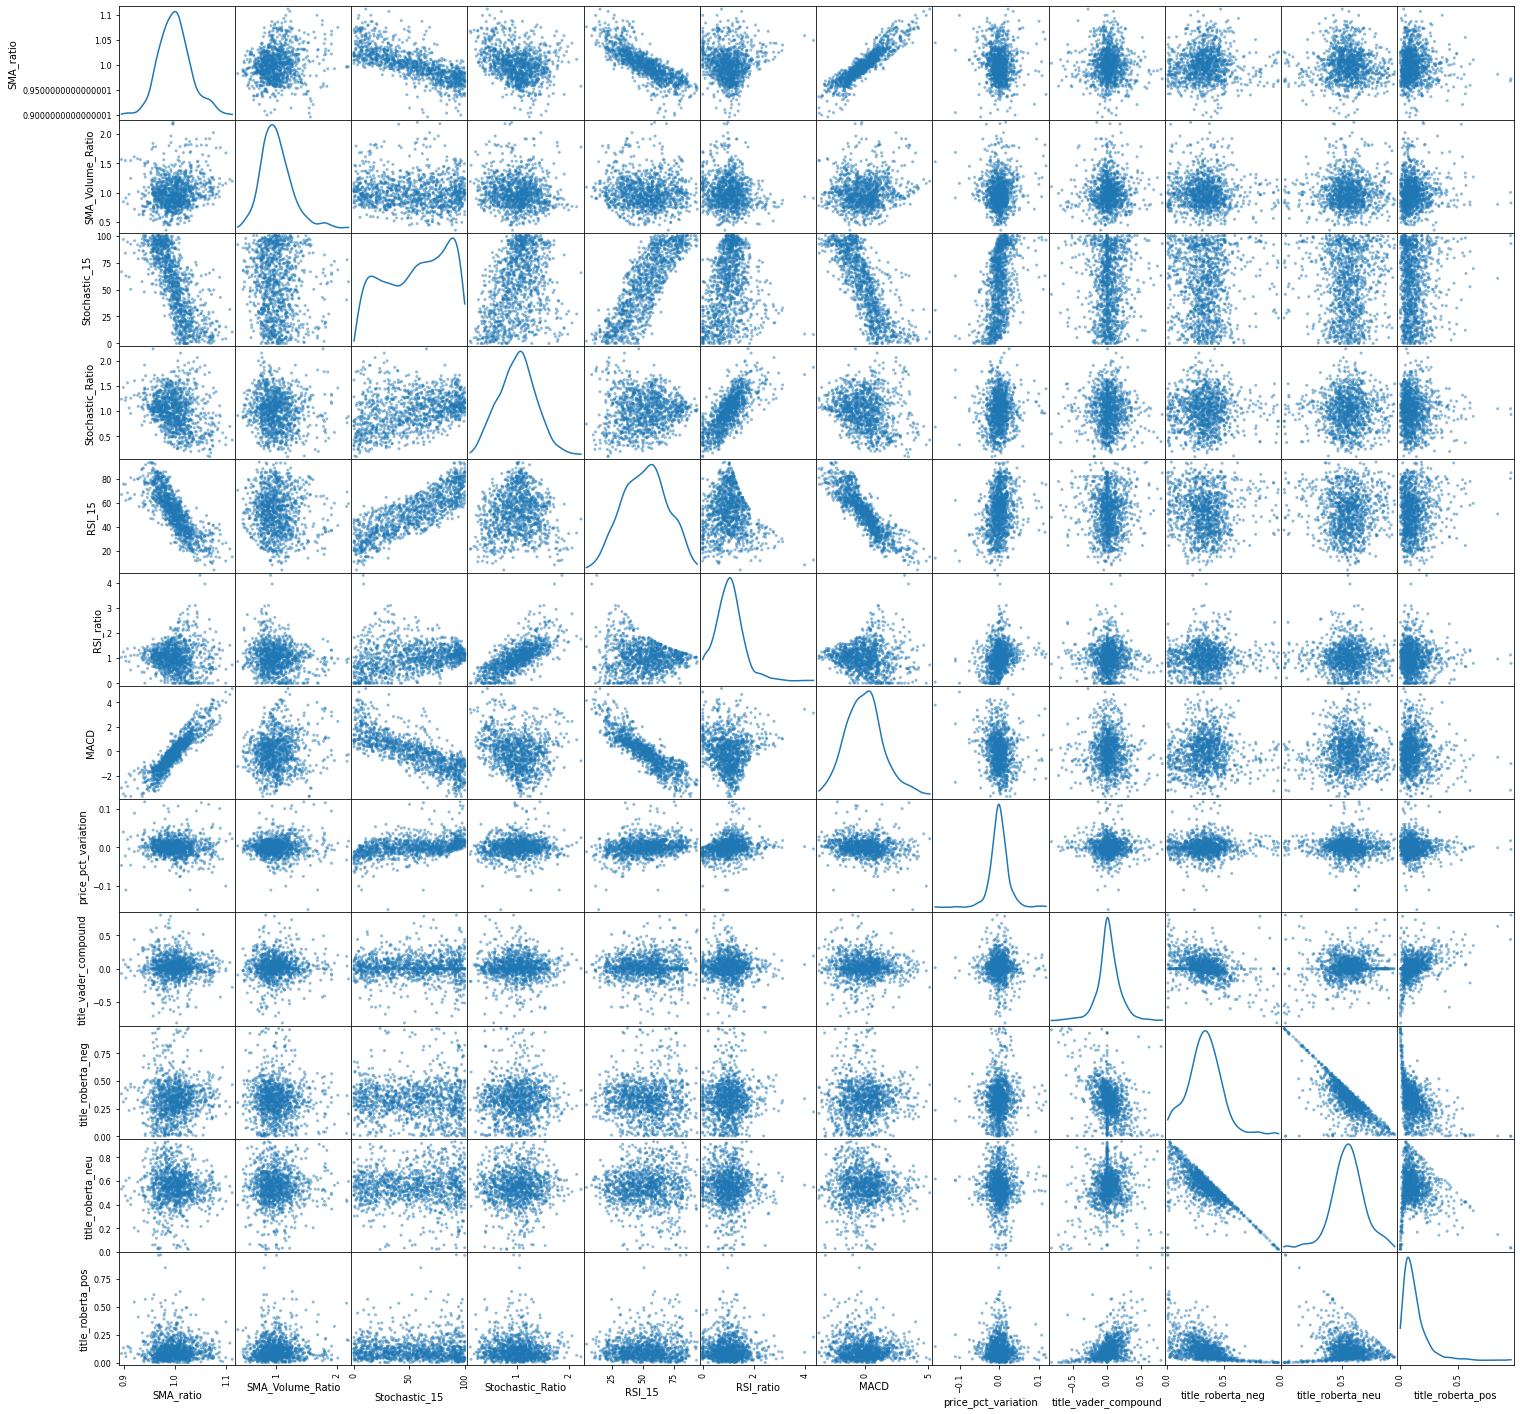

In [69]:
import matplotlib.pyplot as plt

pd.plotting.scatter_matrix(df, diagonal='kde', figsize=(25, 25))

<AxesSubplot:xlabel='SMA_ratio', ylabel='price_pct_variation'>

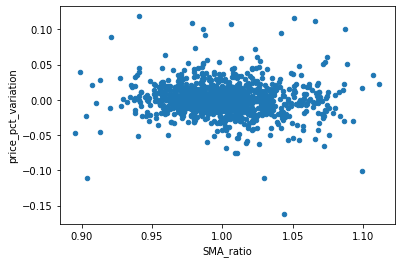

In [71]:
df.plot.scatter(x='SMA_ratio', y='price_pct_variation')

<AxesSubplot:xlabel='RSI_ratio', ylabel='price_pct_variation'>

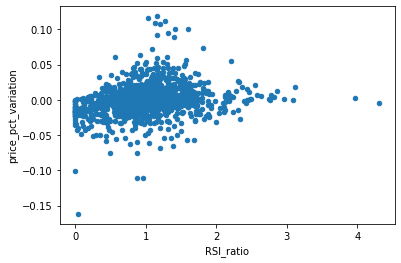

In [73]:
df.plot.scatter(x='RSI_ratio', y='price_pct_variation')

In [74]:
reg_lasso = Lasso(alpha=30)

In [75]:
reg_lasso.fit(X_train, y_train)

Lasso(alpha=30)

In [76]:
reg_lasso.score(X_test, y_test)

-0.0015918936370480363

In [77]:
# Test with random selection of train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [78]:
reg_lasso.fit(X_train, y_train)


Lasso(alpha=30)

In [79]:
reg_lasso.score(X_test, y_test)

-0.0025891712467362993

In [80]:
X.head()

,SMA_ratio,SMA_Volume_Ratio,Stochastic_15,Stochastic_Ratio,RSI_15,RSI_ratio,MACD,price_pct_variation,title_vader_compound,title_roberta_neg,title_roberta_neu,title_roberta_pos
0,0.977920,0.492545,97.353507,1.120103,72.819253,1.203449,-0.581692,0.005325,-0.16735,0.777352,0.212674,0.009974
1,0.980867,0.742189,75.999927,0.982504,74.418628,0.745917,-0.467702,-0.012655,-0.15890,0.352967,0.593894,0.053139
2,0.986854,0.853517,53.600042,0.811504,60.256465,0.399212,-0.265055,-0.016691,-0.17000,0.455775,0.529359,0.014867
3,0.999960,1.239421,3.183555,0.595832,45.764364,0.145136,0.161075,-0.043195,0.44040,0.090196,0.465504,0.444300
4,1.013771,1.492017,8.742321,0.412543,39.408387,0.153017,0.484190,-0.012355,0.09180,0.307789,0.220473,0.471738


In [81]:
y.head()

0    0.005325
1   -0.012655
2   -0.016691
3   -0.043195
4   -0.012355
Name: price_pct_variation, dtype: float64

In [83]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score


In [85]:
# Test with random selection of train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# Perform grid search
print("Grid search...")
regressor = Ridge()
# Grid of values to be tested
params = {
    'alpha': [0.0, 0.1, 0.5, 1.0] # 0 corresponds to no regularization
}
gridsearch = GridSearchCV(regressor, param_grid = params, cv = 3) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best R2 score : ", gridsearch.best_score_)


Grid search...
...Done.
Best hyperparameters :  {'alpha': 0.0}
Best R2 score :  1.0


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=3.98489e-19): result may not be accurate.

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=4.03583e-19): result may not be accurate.

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=4.02596e-19): result may not be accurate.

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=4.06327e-19): result may not be accurate.



In [86]:
# Test with random selection of train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# Perform grid search
print("Grid search...")
regressor = Lasso()
# Grid of values to be tested
params = {
    'alpha': [0.0, 0.1, 0.5, 1.0] # 0 corresponds to no regularization
}
gridsearch = GridSearchCV(regressor, param_grid = params, cv = 3) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best R2 score : ", gridsearch.best_score_)


Grid search...
...Done.
Best hyperparameters :  {'alpha': 0.0}
Best R2 score :  0.9999996217417996


/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: UserWarning:

With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning:

Coordinate descent with no regularization may lead to unexpected results and is discouraged.

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: UserWarning:

With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning:

Coordinate descent with no regularization may lead to unexpected results and is discouraged.

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: UserWarning:

With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression esti

In [87]:
y_train.head()

977   -0.030498
903   -0.011909
131   -0.026306
252   -0.014835
330    0.018864
Name: price_pct_variation, dtype: float64

In [88]:
y_test.head()

1018   -0.003940
1020   -0.013680
870    -0.014930
184    -0.021123
686     0.005501
Name: price_pct_variation, dtype: float64

In [89]:
y_train.shape

(798,)

In [91]:
X_train.shape

(798, 12)

In [92]:
X_test.shape

(343, 12)

In [93]:
y_test.shape

(343,)

In [99]:
X = df.loc[:, features_list]
y = df.loc[:, target_variable]
# Test with random selection of train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Grid search...")
regressor = LinearRegression()
regressor.fit(X_train, y_train)


Grid search...


LinearRegression()

In [100]:
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

In [105]:
print("R2 score on training set: ", r2_score(y_train, y_train_pred))
print("R2 score on test set: ", r2_score(y_test, y_test_pred))


R2 score on training set:  1.0
R2 score on test set:  1.0


ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().